In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from seql import mc, utils

In [67]:
sns.set_context('poster')

In [4]:
data = pd.read_pickle('/Users/epave/Downloads/http_features.pickle')

In [5]:
data.head()

,class,downloadRate,downloadRateHistory,downloadTime,downloadTimeHistory,networkQuality,requestNo,requestUrl,size,sizeHistory,timeFromLastRequest,timeFromLastRequestHistory,videoDuration,videoId,videoUrl,sizeHistoryA,downloadRateHistoryA,timeFromLastRequestHistoryA,downloadTimeHistoryA
36,video,1168.381372,"[0.240780260758, 186.516434113, 1242.45979121,...",98.948,"[4219.615, 497.806, 58.8180000004, 67.37400000...",No trottling,36,https://r6---sn-gvnuxaxjvh-c35e.googlevideo.co...,115609,"[1016, 92849, 73079, 127642, 192250, 239206, 1...",2.213,"[0, 4.751, 0.629, 0.01, 0.005, 0.001, 0.003, 0...",183,0,https://www.youtube.com/watch?v=-BAUznX8HOE,[],[],[],[]
37,audio,703.152364,"[0.240780260758, 186.516434113, 1242.45979121,...",95.928,"[4219.615, 497.806, 58.8180000004, 67.37400000...",No trottling,37,https://r6---sn-gvnuxaxjvh-c35e.googlevideo.co...,67452,"[1016, 92849, 73079, 127642, 192250, 239206, 1...",0.005,"[0, 4.751, 0.629, 0.01, 0.005, 0.001, 0.003, 0...",183,0,https://www.youtube.com/watch?v=-BAUznX8HOE,[115609],[1168.38137204],[2.213],[98.9479999998]
45,video,324.125963,"[0.240780260758, 186.516434113, 1242.45979121,...",356.707,"[4219.615, 497.806, 58.8180000004, 67.37400000...",No trottling,45,https://r6---sn-gvnuxaxjvh-c35e.googlevideo.co...,115618,"[1016, 92849, 73079, 127642, 192250, 239206, 1...",0.048,"[0, 4.751, 0.629, 0.01, 0.005, 0.001, 0.003, 0...",183,0,https://www.youtube.com/watch?v=-BAUznX8HOE,"[115609, 67452]","[1168.38137204, 703.152364275]","[2.213, 0.005]","[98.9479999998, 95.9279999997]"
46,audio,896.545047,"[0.240780260758, 186.516434113, 1242.45979121,...",87.787,"[4219.615, 497.806, 58.8180000004, 67.37400000...",No trottling,46,https://r6---sn-gvnuxaxjvh-c35e.googlevideo.co...,78705,"[1016, 92849, 73079, 127642, 192250, 239206, 1...",0.503,"[0, 4.751, 0.629, 0.01, 0.005, 0.001, 0.003, 0...",183,0,https://www.youtube.com/watch?v=-BAUznX8HOE,"[115609, 67452, 115618]","[1168.38137204, 703.152364275, 324.125963326]","[2.213, 0.005, 0.048]","[98.9479999998, 95.9279999997, 356.707]"
47,video,1454.357900,"[0.240780260758, 186.516434113, 1242.45979121,...",157.530,"[4219.615, 497.806, 58.8180000004, 67.37400000...",No trottling,47,https://r6---sn-gvnuxaxjvh-c35e.googlevideo.co...,229105,"[1016, 92849, 73079, 127642, 192250, 239206, 1...",0.222,"[0, 4.751, 0.629, 0.01, 0.005, 0.001, 0.003, 0...",183,0,https://www.youtube.com/watch?v=-BAUznX8HOE,"[115609, 67452, 115618, 78705]","[1168.38137204, 703.152364275, 324.125963326, ...","[2.213, 0.005, 0.048, 0.503]","[98.9479999998, 95.9279999997, 356.707, 87.787..."


In [6]:
sample = data[['class', 'downloadRate', 'networkQuality', 'requestNo', 'size', 'timeFromLastRequest', 'videoId']]

In [40]:
sample.networkQuality.unique()

array(['No trottling', 'Regular 2G', 'Regular 3G', 'Regular 4G'], dtype=object)

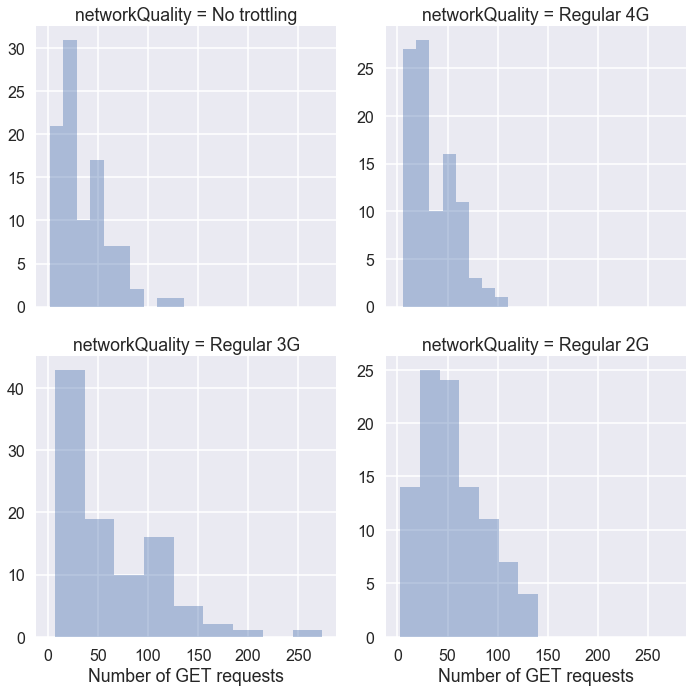

In [73]:
toplot = sample.groupby(['networkQuality', 'videoId']).apply(len).reset_index().rename_axis({0: 'Number of GET requests'}, axis=1)
g = sns.FacetGrid(toplot, col='networkQuality', col_wrap=2,sharey=False,sharex=True,margin_titles=True,size=5,
                  col_order=['No trottling', 'Regular 4G', 'Regular 3G', 'Regular 2G'])
g.map(sns.distplot, 'Number of GET requests', kde=False)

In [85]:
print(toplot.groupby('networkQuality')[['Number of GET requests']].describe().astype(int).to_latex())

\begin{tabular}{llr}
\toprule
             &       &  Number of GET requests \\
networkQuality & {} &                         \\
\midrule
No trottling & count &                      97 \\
             & mean &                      35 \\
             & std &                      25 \\
             & min &                       2 \\
             & 25\% &                      17 \\
             & 50\% &                      26 \\
             & 75\% &                      49 \\
             & max &                     136 \\
Regular 2G & count &                      99 \\
             & mean &                      55 \\
             & std &                      31 \\
             & min &                       3 \\
             & 25\% &                      29 \\
             & 50\% &                      51 \\
             & 75\% &                      79 \\
             & max &                     140 \\
Regular 3G & count &                      97 \\
             & mean &               

In [7]:
sample['class'] = sample['class'].replace({'audio': 'A', 'video': 'V'})

/Users/epave/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
sample.head()

,class,downloadRate,networkQuality,requestNo,size,timeFromLastRequest,videoId
36,V,1168.381372,No trottling,36,115609,2.213,0
37,A,703.152364,No trottling,37,67452,0.005,0
45,V,324.125963,No trottling,45,115618,0.048,0
46,A,896.545047,No trottling,46,78705,0.503,0
47,V,1454.357900,No trottling,47,229105,0.222,0


In [10]:
sample = sample[logical_not(sample.videoId.isin([102,52,32,90,57,45]))]

In [9]:
sample[sample.networkQuality == 'No trottling'].groupby('videoId').apply(len).sort_values().head()

videoId
102    2
52     2
32     7
90     7
57     8
dtype: int64

In [10]:
sample.networkQuality.unique()

array(['No trottling', 'Regular 2G', 'Regular 3G', 'Regular 4G'], dtype=object)

In [11]:
max_length = 3

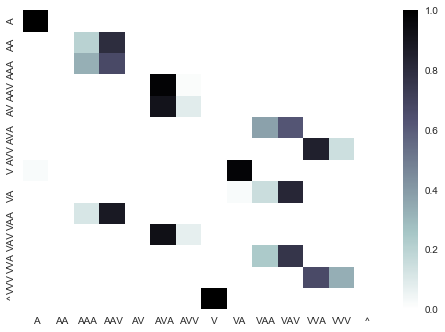

In [15]:
model_nt = mc.MarkovChainModel(DecisionTreeClassifier(), target_label='class', sequence_split_label='videoId',
                           max_state_length=max_length)
model_nt.fit(sample[sample.networkQuality == 'No trottling'].drop('networkQuality', axis=1))
sns.heatmap(model_nt.transition_matrix, cmap=cm.bone_r)

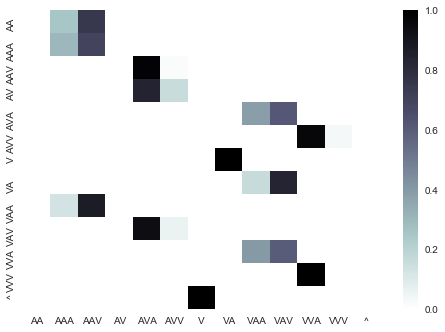

In [16]:
model_4g = mc.MarkovChainModel(DecisionTreeClassifier(), target_label='class', sequence_split_label='videoId',
                           max_state_length=max_length)
model_4g.fit(sample[sample.networkQuality == 'Regular 4G'].drop('networkQuality', axis=1))
sns.heatmap(model_4g.transition_matrix, cmap=cm.bone_r)

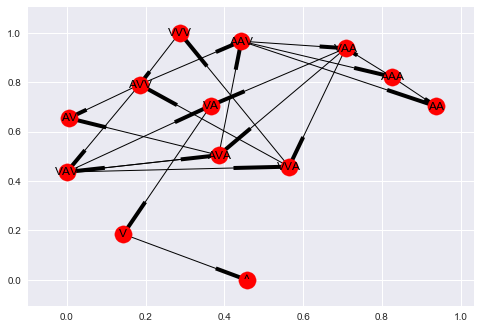

In [19]:
model_4g.transition_graph

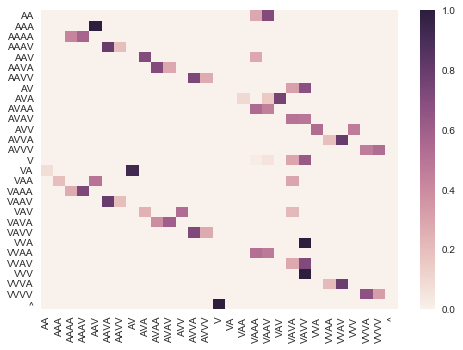

In [41]:
model_3g = mc.MarkovChainModel(DecisionTreeClassifier(), target_label='class', sequence_split_label='videoId',
                           max_state_length=max_length)
model_3g.fit(sample[sample.networkQuality == 'Regular 3G'].drop('networkQuality', axis=1))
sns.heatmap(model_3g.transition_matrix)

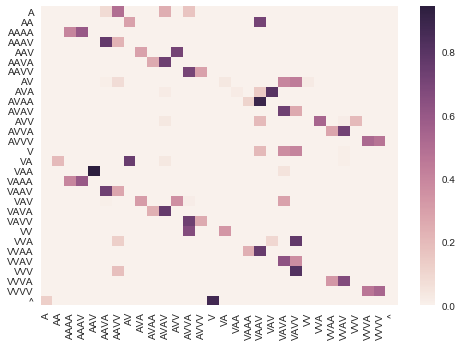

In [42]:
model_2g = mc.MarkovChainModel(DecisionTreeClassifier(), target_label='class', sequence_split_label='videoId',
                           max_state_length=max_length)
model_2g.fit(sample[sample.networkQuality == 'Regular 2G'].drop('networkQuality', axis=1))
sns.heatmap(model_2g.transition_matrix)

In [43]:
similarity = pd.DataFrame(columns=range(4), index=range(4), dtype=float)
for a, model_a in enumerate([model_nt, model_4g, model_3g, model_2g]):
    for b, model_b in enumerate([model_nt, model_4g, model_3g, model_2g]):
        similarity[a][b] = model_a.transition_graph.calc_similarity(model_b.transition_graph.to_matrix())

In [44]:
similarity.columns = ['No trottling', 'Regular 4G', 'Regular 3G', 'Regular 2G']
similarity.index = ['No trottling', 'Regular 4G', 'Regular 3G', 'Regular 2G']

In [45]:
similarity

,No trottling,Regular 4G,Regular 3G,Regular 2G
No trottling,1.000000,0.962488,0.898048,0.904385
Regular 4G,0.962488,1.000000,0.885451,0.916145
Regular 3G,0.898048,0.885451,1.000000,0.904075
Regular 2G,0.904385,0.916145,0.904075,1.000000


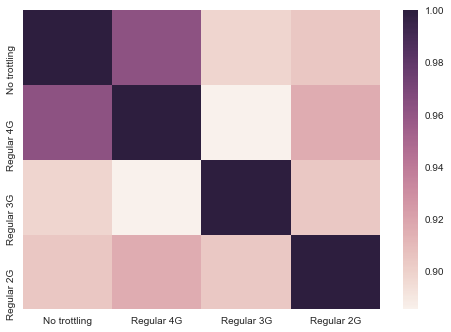

In [46]:
sns.heatmap(similarity)

In [49]:
pred = model_nt.query(sample[logical_and(sample.networkQuality == 'No trottling',
                                  sample.videoId == 3)].drop(['networkQuality', 'class', 'videoId'], axis=1), 
               return_states_history=True)

In [50]:
real = sample[logical_and(sample.networkQuality == 'No trottling',
                                  sample.videoId == 3)]['class']

In [51]:
pred[0]

'V'

In [52]:
''.join(real.values[2:])

'VAVAVAVAVAAVAVAAVAVAVAAVAVAAVAVAAVAVAAVAVAA'

In [53]:
''.join(pred[1].apply(lambda x: x[-1] if isinstance(x, str) else x).values[2:])

'AVAVAVAVAVVAVAVVAVAVAVVAVAVVAVAVVAVAVVAVAVV'

In [54]:
from collections import Counter

In [55]:
Counter(''.join(real.values[2:]))

Counter({'A': 25, 'V': 18})

In [56]:
Counter(''.join(pred[1].apply(lambda x: x[-1] if isinstance(x, str) else x).values[2:]))

Counter({'A': 18, 'V': 25})

In [351]:
%autoreload
from seql import mc, utils

In [413]:
from sklearn import model_selection

In [414]:
group_kfold = model_selection.GroupKFold(n_splits=10)

In [464]:
results = []
max_length = 2

for quality in ['No trottling', 'Regular 4G', 'Regular 3G', 'Regular 2G']:
    thesample = sample[sample.networkQuality == quality].drop('networkQuality', axis=1)
    group_kfold = model_selection.GroupKFold(n_splits=10)
    for train_idx, test_idx in group_kfold.split(thesample.values, groups=thesample.videoId.values):
        model = mc.MarkovChainModel(DecisionTreeClassifier(), 
                                    target_label='class', sequence_split_label='videoId',
                                    max_state_length=max_length)
        model.fit(thesample.iloc[train_idx])
        for length in [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 17, 20, 25]:
            for vid in thesample.iloc[test_idx].videoId.unique():
                subsample = thesample[thesample.videoId == vid].drop(['class', 'videoId'], axis=1)
                if len(subsample) < length:
                    continue
                if length is not None:
                    subsample = subsample.iloc[:length]
                        
                if len(subsample) > 0:
                    pred = model.query(subsample, return_states_history=True)
                    pred = pred[1].apply(lambda x: x[-1] if isinstance(x, str) else x)
                    if length is not None:
                        real = thesample[thesample.videoId == vid]['class'].iloc[:length]
                    else:
                        real = thesample[thesample.videoId == vid]['class']
                    errors = pred.values != real.values
                    results.append([sum(logical_and(errors, pred == 'V')), sum(logical_and(errors, pred == 'A')),
                                   len(real), quality])

In [465]:
accuracy = pd.DataFrame(results, columns=['A->V', 'V->A', 'SeqLen', 'Quality'])

In [466]:
accuracy['V->A Ratio'] = accuracycyacy['V->A'] / accuracy['SeqLen']
accuracy['A->V Ratio'] = accuracy['A->V'] / accuracy['SeqLen']

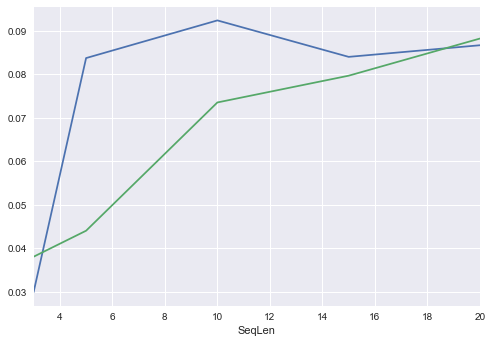

In [461]:
accuracy.groupby('SeqLen')['V->A Ratio'].apply(mean).plot()
accuracy.groupby('SeqLen')['A->V Ratio'].apply(mean).plot()

In [369]:
quality = 'No trottling' #'Regular 2G' #'No trottling'

In [408]:
max_length = 2
test_idx = range(50,70)
model_nt = mc.MarkovChainModel(DecisionTreeClassifier(), target_label='class', sequence_split_label='videoId',
                           max_state_length=max_length)
xx = sample[sample.networkQuality == quality].drop('networkQuality', axis=1)
xx = xx[logical_not(xx.videoId.isin([test_idx]))]
model_nt.fit(xx)

MarkovChainModel(base_estimator=CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
            cv=3, method='sigmoid'),
         max_state_length=2, min_support=None,
         sequence_split_label='videoId', target_label='class')

In [409]:
preds = []
reals = []
for vid in test_idx:
    subsample = sample[logical_and(sample.networkQuality == quality,
                                   sample.videoId == vid)].drop(['networkQuality', 'class', 'videoId'], axis=1)
    if len(subsample) > 0:
        pred = model_nt.query(subsample, return_states_history=True)
        preds.append(''.join(pred[1].apply(lambda x: x[-1] if isinstance(x, str) else x)))
    #                  .replace('A','Z').replace('V', 'A').replace('Z', 'V'))
        reals.append(''.join(sample[logical_and(sample.networkQuality == quality,
                                      sample.videoId == vid)]['class']))

In [410]:

for i in range(len(preds)):
    pred = array([val for val in preds[i]])
    errors = pred != [val for val in reals[i]]
    accuracy.ix[i]['A->V'] = sum(logical_and(errors, pred == 'V'))
    accuracy.ix[i]['V->A'] = sum(logical_and(errors, pred == 'A'))
    accuracy.ix[i]['Len'] = len(preds[i])

In [411]:
accuracy

,A->V,V->A,Len
0,0,0,17
1,0,0,49
2,0,0,14
3,0,0,12
4,0,0,68
5,0,1,24
6,0,0,89
7,0,0,10
8,0,0,22
9,0,1,17


In [407]:
print('', preds[9],'\n', reals[9])

 VAAVAVAAVAAVAVAAVAVAAVAAVAAAAVAAVAAVAVAAVAAVA 
 VAAVAVAAVAAVAVAAVAAAAVAAAAAAAVAAVAAVAVAAVAAVA


In [346]:
pred[1].apply(lambda x: x[-1] if isinstance(x, str) else x).values[1:]

array(['V', 'V', 'V', 'V', 'V', 'A', 'V', 'A', 'V', 'A', 'V', 'A', 'A',
       'V', 'A', 'A', 'V', 'A', 'A', 'A', 'A', 'V', 'A', 'A', 'V', 'A',
       'V', 'A', 'A', 'A', 'A', 'A', 'V', 'V', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'V', 'A', 'A', 'A', 'A', 'A', 'A', 'V', 'V', 'A', 'A',
       'A', 'A', 'A', 'A', 'V', 'A', 'V', 'A', 'V', 'V', 'V', 'V', 'A',
       'V', 'V', 'A', 'V', 'A', 'V', 'A', 'A', 'V', 'A', 'V', 'V', 'A',
       'A', 'V', 'A', 'V', 'V', 'A'], dtype=object)

In [42]:
''.join(sample[logical_and(sample.networkQuality == 'No trottling',
                                  sample.videoId == 100)]['class'].values)

'VAVAVAVVAAVAVAAVAVAVAAVAVAAVAVAAVAAVAVAVAAVVAAV'

In [361]:
seq = ''.join(sample[logical_and(sample.networkQuality == 'No trottling',
                                  sample.videoId == 0)]['class'].values)

In [362]:
dat =  sample[logical_and(sample.networkQuality == 'No trottling',
                                  sample.videoId == 0)].drop(['networkQuality', 'class', 'videoId'], axis=1)

In [363]:
dat

,downloadRate,requestNo,size,timeFromLastRequest
36,1168.381372,36,115609,2.213
37,703.152364,37,67452,0.005
45,324.125963,45,115618,0.048
46,896.545047,46,78705,0.503
47,1454.357900,47,229105,0.222
53,1687.590877,53,162488,0.116
55,1116.780375,55,414464,0.496
57,4005.732944,57,793748,0.645
58,756.976612,58,227149,0.219
59,1084.842550,59,341196,0.238


$T_{1}[j,i]\gets B_{jy_{i}}\cdot \max _{k}{(T_{1}[k,i-1]\cdot A_{kj})}$

$T_{2}[j,i]\gets \arg \max _{k}{(T_{1}[k,i-1]\cdot A_{kj}})$

In [364]:
def _viterbi(self, emission_matrix):
    sample_length = len(emission_matrix)
    trans1 = pd.DataFrame(index=emission_matrix.columns,
                          columns=range(sample_length))
    trans2 = pd.DataFrame(index=emission_matrix.columns,
                          columns=range(sample_length))
    trans1[0] = (emission_matrix.ix[0] * self.init_probas).fillna(0)
    trans2[0] = 0
    # TODO: refactoring fot faster matrix opertations
    for i in range(1, sample_length):
        t = (np.tile(trans1[i-1], (len(self.transition_matrix), 1)) * self.transition_matrix.T)
#         for state in self.transition_matrix.columns:
#             t = pd.Series(index=self.transition_matrix.columns)
#             for state_prev in self.transition_matrix.columns:
#                 t.ix[state_prev] = trans1[i-1].ix[state_prev] * self.transition_matrix[state_prev].ix[state]
#             trans1[i].ix[state] = emission_matrix.ix[i][state] * t.ix[state].max()
#             trans2[i].ix[state] = t.ix[state].idxmax()
#         print(t.max(axis=1))
        trans1[i] = emission_matrix.ix[i] * t.max(axis=1)
        trans2[i] = t.idxmax(axis=1)
#         print(trans2[i].values.flatten())
        
    print(trans2)

    zt = pd.Series(index=range(sample_length))
    xt = pd.Series(index=range(sample_length))
    zt[sample_length - 1] = trans1[sample_length - 1].idxmax()
    xt[sample_length - 1] = zt[sample_length - 1]
    for i in range(sample_length - 1, 0, -1):
        zt[i - 1] = trans2[i][zt[i]]
        xt[i - 1] = zt[i - 1]
    return xt

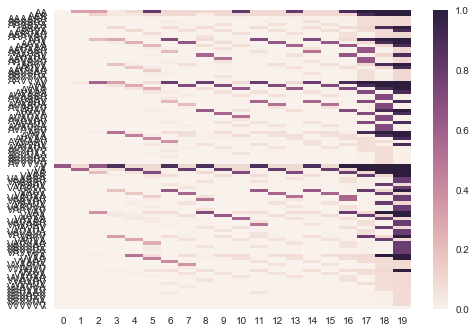

In [365]:
sns.heatmap(emission_matrix.T)

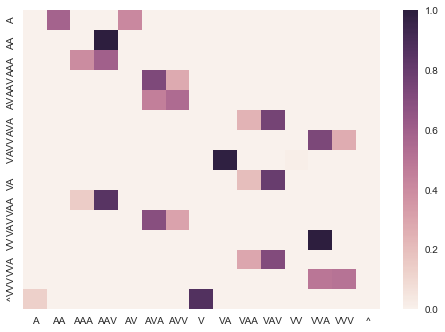

In [366]:
sns.heatmap(model_nt.transition_matrix)

In [367]:
probas = model_nt.base_estimator.predict_proba(dat)
emission_matrix = model_nt._get_emission_matrix(probas, model_nt.init_probas)
states = _viterbi(model_nt, emission_matrix=emission_matrix)

     0  1   2    3    4    5    6    7    8    9    10   11   12   13   14  \
A     0  A   A    A    A    A    A    A    A    A    A    A    A    A    A   
AA    0  A   A    A    A    A    A    A    A    A    A    A    A    A    A   
AAA   0  A   A  VAA  AAA  VAA  AAA  VAA  VAA  VAA  AAA  VAA  VAA  VAA  VAA   
AAV   0  A  AA  VAA  AAA  VAA  VAA  VAA  VAA  VAA  VAA  VAA  VAA  VAA  VAA   
AV    0  A   A    A    A    A    A    A    A    A    A    A    A    A    A   
AVA   0  A  AV  VAV  AAV  VAV  AAV  VAV  VAV  VAV  AAV  VAV  VAV  VAV  VAV   
AVV   0  A  AV  VAV  AAV  VAV  AAV  VAV  VAV  VAV  AAV  VAV  VAV  VAV  VAV   
V     0  A   A    A    A    A    A    A    A    A    A    A    A    A    A   
VA    0  V   A    A    A    A    A    A    A    A    A    A    A    A    A   
VAA   0  A  VA  VVA  AVA  AVA  AVA  VVA  VVA  VVA  AVA  VVA  VVA  VVA  VVA   
VAV   0  A  VA  VVA  AVA  AVA  AVA  VVA  VVA  VVA  AVA  VVA  VVA  VVA  VVA   
VV    0  V   A    A    A    A    A    A    A    A    A    A    A

In [368]:
states

0       V
1      VA
2     VAV
3     AVA
4     VAV
5     AVV
6     VVV
7     VVV
8     VVV
9     VVV
10    VVV
11    VVV
12    VVV
13    VVV
14    VVV
15    VVV
16    VVV
17    VVV
18    VVV
19    VVV
dtype: object

In [261]:
seq

'VAVAVAVVAAVAVAAVAAVA'